# Problem in hand :

###   Diabetic retinopathy prediction in patients 

#### Business Objective:
The variable to be predicted has two values (positive or negative on diabetic retinopathy). Thus, this is a binary classification project. The goal here is to predict whether a patient will suffer from diabetic retinopathy or not, conditioned on blood test features.


In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

### importing the dataset here we have dropped the index column 

In [2]:
data = pd.read_csv("pronostico_dataset.csv",index_col=0)
data.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
ID,,,,,
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy


# Data Set Details:
### Target variables has two values in a classification project type: 0 (false) or 1 (true). 
### The number of instances (rows) in the data set is 6000, and the number of variables (columns) is 6.
### The following list summarizes the information of the variables
#### 1)ID: Numeric
#### 2)age: (numeric).
#### 3)systolic_bp: (normal range: below 120mmHg). When the heart beats, it squeezes and pushes blood through the arteries to the rest of the body. This force creates pressure on the blood vessels, and that is the systolic blood pressure.
#### 4)diastolic_bp: (normal range: lower than 80mmHg). It is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen.
#### 5)cholesterol: (normal range: between 125 and 200 mg/dl). It is a waxy, fat-like substance found in every cell in the body.
#### 6)prognosis: (0 or 1) (Target). It is 1 if the patient has retinopathy and 0 if he doesn't.


# Exploratory Data Analysis:
 here we will do the complete EDA and draw some insights

In [3]:
# at first we will create the copy of the dataset to keep orignal dataset beside from our analysis
d_data = data.copy()
d_data.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
ID,,,,,
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [4]:
d_data.tail()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
ID,,,,,
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy
5999,62.506825,96.900784,86.878033,108.625436,no_retinopathy


In [5]:
print(f"data set colums are : {d_data.columns}")


data set colums are : Index(['age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')


In [6]:
data.dtypes

age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis        object
dtype: object

In [7]:
d_data.describe()

,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,60.464121,100.694822,90.505547,100.628255
std,8.564392,10.669267,9.648200,10.433915
min,35.164761,69.675429,62.807105,69.967453
25%,54.371941,93.267420,83.641788,93.202373
50%,59.831159,100.119926,89.912429,100.060637
75%,65.809652,107.439501,96.682405,107.250829
max,103.279497,151.699660,133.456382,148.233544


### From above description of the datset we can draw some insights which are as follows:
age) in the age column the maximum age is 103 and the minimum age is 35

systolic_bp) in the systolic_bp column the maximum level counterd was 151 and the minimum level was 69

diastolic_bp) in the diastolic_bp column the maximum level counterd was 133 and the minimum level was 62

cholestrol) in the cholestrol column the maximum level counterd was 148 and the minimum level was 69

#### now we will type cast the columns if the types are misleading

In [8]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           6000 non-null   float64
 1   systolic_bp   6000 non-null   float64
 2   diastolic_bp  6000 non-null   float64
 3   cholesterol   6000 non-null   float64
 4   prognosis     6000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 281.2+ KB


here we can see 4 continous columns are of float datatype and the target variable is object hence there is no need to change the datatypes. for the target variable it will be converted when we will be doing encoding on the same

In [9]:
d_data.dtypes

age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis        object
dtype: object

# missing values or null vlaues

first thing we should do :D

In [10]:
d_data.isnull().sum()

age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

data set has no null values so no need of missing values imputation

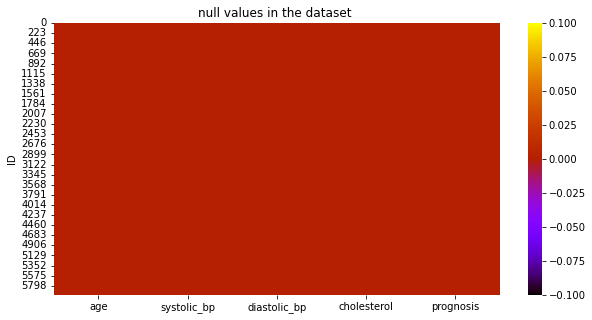

In [11]:
plt.figure(figsize = (10,5))
sns.heatmap(d_data.isnull(),cmap='gnuplot')
plt.title('null values in the dataset ')
plt.show()

from heatmap also we can see there are no null values are present in the dataset

### As we know we have only one catogorcal variableis in the dataset which is our target variable we will see the count of it

In [12]:
d_data.prognosis.value_counts()

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

from above observation we can say our data is not imbalenced

## now we wil encode the catogorial variable which is prognosis using one hot encoding

In [16]:
d_data['prognosis'] = d_data['prognosis'].map({'retinopathy': 1,'no_retinopathy':0})

In [17]:
d_data.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
ID,,,,,
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1


In [18]:
d_data[d_data['prognosis']==1]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
ID,,,,,
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5991,59.903956,105.516534,99.069641,108.177934,1
5992,72.708129,115.105489,99.500383,126.590583,1
5996,63.099686,100.039527,93.515186,104.971404,1


In [19]:
d_data[d_data['prognosis']==0]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
ID,,,,,
12,66.890987,93.205124,85.270310,106.465128,0
15,62.929328,101.524942,95.684936,102.916473,0
16,74.275743,91.245927,78.204968,99.417104,0
17,58.267020,101.259314,86.790774,102.242965,0
18,62.744349,89.883434,80.923457,102.083878,0
...,...,...,...,...,...
5989,66.273056,95.931085,97.187327,112.075571,0
5993,53.279942,88.726857,78.845703,86.271988,0
5994,56.603050,105.062208,91.448914,111.989797,0


## Outliers detection:

for this we have 3 techniques which are as follows
1) boxplot which is nothing but the so called IQR technique
2) dbscan clustering
3) isolation forest

note: this techniques are used only for detecting and to see the range of the outliers. 
we will use box plot and the isolation forest for this 

In [13]:
plt.style.use('ggplot')

#### Boxplot

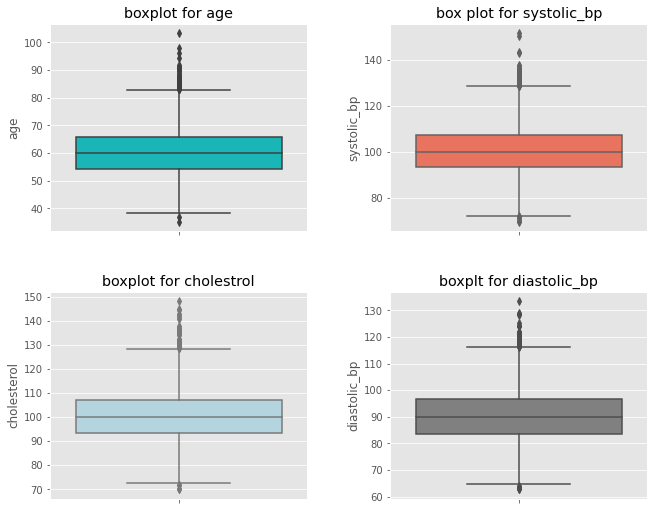

In [14]:
continous_list = ['age', 'systolic_bp', 'diastolic_bp','cholesterol']
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.boxplot(y = d_data['age'],color='darkturquoise')
plt.title('boxplot for age')

plt.subplot(2,2,2)
sns.boxplot(y = d_data['systolic_bp'],color='tomato')
plt.title('box plot for systolic_bp')

plt.subplot(2,2,3)
sns.boxplot(y = d_data['cholesterol'],color = 'lightblue')
plt.title('boxplot for cholestrol')

plt.subplot(2,2,4)
sns.boxplot(y = d_data['diastolic_bp'],color = 'grey')
plt.title('boxplt for diastolic_bp')

plt.tight_layout(pad = 4)
plt.show()

from the above boxplots we can see outliers are in all the continous columns we will treat them when we will be doing outlier treatment as per reqirement

from the boxplots we can say
1) in age column peoples more than age 80 are considered as outliers

2) in systolic_bp peoples with more than 130 systolic_bp are considered as outliers

3) in diastolis_bp peoples with more than 118 are considered as outliers

4) in cholestrol peoples with more than 129 level are considered as outliers 

#### Isolation Forest:

Bydefault isolation forest wil give -1 to the outliers and 1 to the normal datapoint

In [21]:
from sklearn.ensemble import IsolationForest

In [22]:
# instatiating an object
i_model = IsolationForest(random_state=10,contamination=.01)
i_model.fit(d_data) # fitting on the data 

IsolationForest(contamination=0.01, random_state=10)

In [24]:
y_pred_outliers = i_model.predict(d_data) # predicting for the data

In [25]:
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
d_data['cluster_id'] =  y_pred_outliers # adding the column to the orignal data which will show the anamoly and the normal data
d_data.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis,cluster_id
ID,,,,,,
0,77.196340,85.288742,80.021878,79.957109,1,1
1,63.529850,99.379736,84.852361,110.382411,1,1
2,69.003986,111.349455,109.850616,100.828246,1,1
3,82.638210,95.056128,79.666851,87.066303,1,1
4,78.346286,109.154591,90.713220,92.511770,1,1


In [31]:
d_data[d_data['cluster_id']==-1].count()

age             60
systolic_bp     60
diastolic_bp    60
cholesterol     60
prognosis       60
cluster_id      60
dtype: int64

from above observation we can say there are aprox 60 outliers are present in the data  

#### Now will see the distribution of the data and we will see the skewnesss of the data

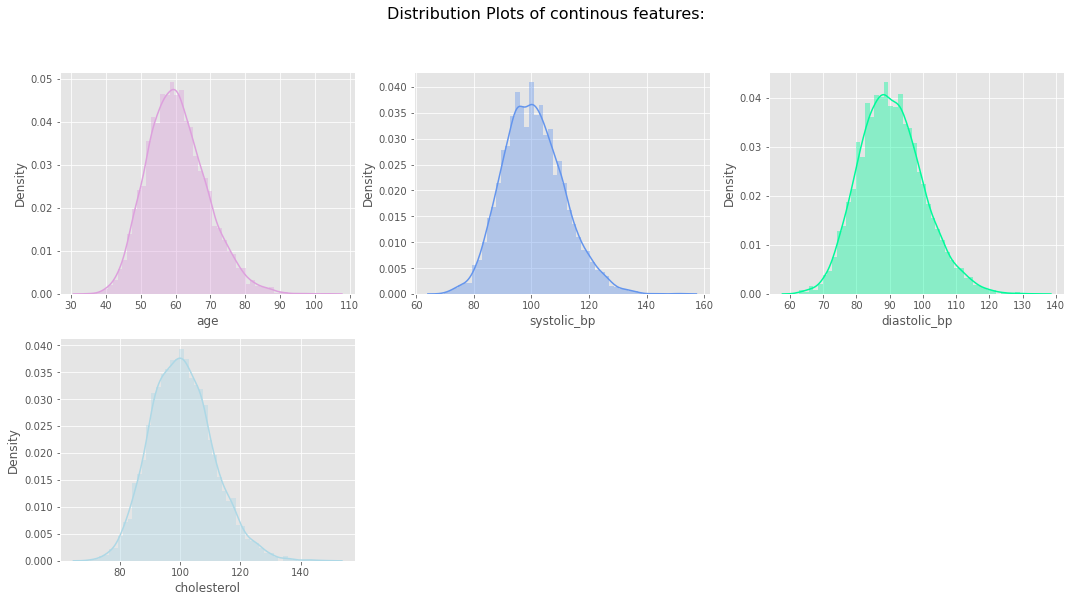

In [15]:

color_list = ['plum', 'cornflowerblue', 'mediumspringgreen','lightblue']
plt.figure(figsize = (18, 9))
plt.suptitle("Distribution Plots of continous features:", fontsize=16)
for i in range(0, len(continous_list)):
    plt.subplot(2, 3, i+1)
    sns.distplot(d_data[continous_list[i]], color = color_list[i])

from above observations we can see the data is noramlly distributed hence no need to handel skewness also


 Now we will check the skewness of the data it is not really needed because in above distribution plots we have seen our features are normaly distrubuted but as a part of EDA we will check once

In [20]:
d_data.skew()

age             0.441141
systolic_bp     0.334655
diastolic_bp    0.336555
cholesterol     0.361514
prognosis      -0.058039
dtype: float64

from this observation we can see the data is not that skewed hence no need to do transformation on the data to remove skewness also